# Exploratory Data Analysis (EDA)
### Initial data preprocessing and exploration on airbnb 10/3/2015 dataset and cleaning it to turn into a golden_airbnb version for EDA

In [1]:
#dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Dense
import graphviz
import pydotplus
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from keras.models import load_model
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Read the csv file into a pandas DataFrame

airbnb = pd.read_csv('listings.csv')
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7087327,https://www.airbnb.com/rooms/7087327,20151002231825,2015-10-03,Historic DC Condo-Walk to Capitol!,Professional pictures coming soon! Welcome to ...,NaN,Professional pictures coming soon! Welcome to ...,none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,18,NaN
1,975833,https://www.airbnb.com/rooms/975833,20151002231825,2015-10-03,Spacious Capitol Hill Townhouse,NaN,Beautifully renovated Capitol Hill townhouse. ...,Beautifully renovated Capitol Hill townhouse. ...,none,NaN,...,9.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,strict,f,f,1,2.11
2,8249488,https://www.airbnb.com/rooms/8249488,20151002231825,2015-10-03,Spacious/private room for single,This is an ideal room for a single traveler th...,NaN,This is an ideal room for a single traveler th...,none,NaN,...,NaN,f,NaN,NaN,f,flexible,f,f,1,1.00
3,8409022,https://www.airbnb.com/rooms/8409022,20151002231825,2015-10-03,A wonderful bedroom with library,Prime location right on the Potomac River in W...,NaN,Prime location right on the Potomac River in W...,none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,1,NaN
4,8411173,https://www.airbnb.com/rooms/8411173,20151002231825,2015-10-03,Downtown Silver Spring,"Hi travellers! I live in this peaceful spot, b...",This is a 750 sq ft 1 bedroom 1 bathroom. Whi...,"Hi travellers! I live in this peaceful spot, b...",none,Silver Spring is booming. You can walk to a n...,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN


In [3]:
airbnb.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3718,1544877,https://www.airbnb.com/rooms/1544877,20151002231825,2015-10-03,"Capitol Hill, DC - Great Location!","Fully furnished apartment ( 1 bedroom, 1 bath,...",Historic Victorian house on Capitol Hill. Expe...,"Fully furnished apartment ( 1 bedroom, 1 bath,...",none,Experience living in the Historic District. Th...,...,10.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,strict,f,f,1,0.79
3719,1806338,https://www.airbnb.com/rooms/1806338,20151002231825,2015-10-03,Lovely bright bedroom.,This comfortable room that fits two is situate...,A warm family home.,This comfortable room that fits two is situate...,none,Capitol Hill is a gorgeous neighborhood in the...,...,10.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,moderate,f,f,1,1.95
3720,1817907,https://www.airbnb.com/rooms/1817907,20151002231825,2015-10-03,Hill Flats DC - WALK EVERYWHERE!,Hill Flats DC is an owner managed luxury 1880 ...,Welcome to Hill Flats DC! Hill Flats DC is an ...,Hill Flats DC is an owner managed luxury 1880 ...,none,NaN,...,9.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,strict,f,f,2,0.66
3721,4223238,https://www.airbnb.com/rooms/4223238,20151002231825,2015-10-03,One Bedroom Capitol Hill Retreat,"This spacious, light-filled, serene one-bedroo...",This renovated english basement is perfectly s...,"This spacious, light-filled, serene one-bedroo...",none,"Just blocks from the Capitol grounds, this apa...",...,10.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,moderate,f,f,1,3.98
3722,7837187,https://www.airbnb.com/rooms/7837187,20151002231825,2015-10-03,Cozy studio blocks from Capitol,"4 blocks from the Capitol, 3 blocks to Eastern...",NaN,"4 blocks from the Capitol, 3 blocks to Eastern...",none,NaN,...,10.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,1,1.00


In [4]:
airbnb.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.723000e+03,3.723000e+03,3.723000e+03,3723.000000,3723.000000,0.0,3723.000000,3723.000000,3723.000000,3696.000000,...,2855.00000,2848.000000,2847.000000,2847.000000,2851.000000,2851.000000,2851.000000,1.000000e+00,3723.000000,2893.000000
mean,4.798778e+06,2.015100e+13,1.497402e+07,13.517325,13.517325,NaN,38.913967,-77.023294,3.195004,1.256358,...,93.42627,9.540730,9.330875,9.710924,9.752718,9.386180,9.323395,5.005130e+11,3.174590,1.803446
std,2.639497e+06,8.790243e-01,1.351108e+07,64.534408,64.534408,NaN,0.021647,0.026951,2.012216,0.585539,...,7.77311,0.790103,1.050435,0.672492,0.605433,0.890065,0.836415,NaN,6.123187,1.765808
min,3.192000e+03,2.015100e+13,1.585000e+03,1.000000,1.000000,NaN,38.825061,-77.110525,1.000000,0.000000,...,30.00000,2.000000,2.000000,2.000000,3.000000,4.000000,2.000000,5.005130e+11,1.000000,0.010000
25%,2.482238e+06,2.015100e+13,3.433722e+06,1.000000,1.000000,NaN,38.901789,-77.039859,2.000000,1.000000,...,90.00000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,5.005130e+11,1.000000,0.560000
50%,5.002566e+06,2.015100e+13,1.037275e+07,1.000000,1.000000,NaN,38.913375,-77.026410,2.000000,1.000000,...,95.00000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,5.005130e+11,1.000000,1.110000
75%,7.148024e+06,2.015100e+13,2.433087e+07,3.000000,3.000000,NaN,38.926509,-77.002798,4.000000,1.000000,...,100.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.005130e+11,2.000000,2.500000
max,8.688666e+06,2.015100e+13,4.555465e+07,480.000000,480.000000,NaN,38.996382,-76.913137,16.000000,8.000000,...,100.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.005130e+11,41.000000,10.980000


In [5]:
airbnb['price'].value_counts()

$100.00    167
$150.00    147
$125.00    128
$99.00     121
$120.00    119
$75.00     109
$90.00     106
$95.00     103
$85.00      96
$110.00     83
$65.00      82
$80.00      78
$70.00      73
$175.00     68
$60.00      68
$115.00     68
$130.00     60
$200.00     59
$105.00     56
$250.00     55
$50.00      54
$135.00     54
$89.00      53
$140.00     45
$149.00     45
$55.00      42
$79.00      39
$129.00     36
$300.00     35
$109.00     33
          ... 
$975.00      1
$212.00      1
$695.00      1
$800.00      1
$152.00      1
$372.00      1
$258.00      1
$515.00      1
$535.00      1
$333.00      1
$10.00       1
$270.00      1
$253.00      1
$157.00      1
$176.00      1
$133.00      1
$429.00      1
$750.00      1
$228.00      1
$315.00      1
$201.00      1
$223.00      1
$440.00      1
$31.00       1
$310.00      1
$196.00      1
$163.00      1
$418.00      1
$749.00      1
$222.00      1
Name: price, Length: 284, dtype: int64

In [6]:
airbnb['Total Cost']=airbnb['price']+airbnb['cleaning_fee']
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Total Cost
0,7087327,https://www.airbnb.com/rooms/7087327,20151002231825,2015-10-03,Historic DC Condo-Walk to Capitol!,Professional pictures coming soon! Welcome to ...,NaN,Professional pictures coming soon! Welcome to ...,none,NaN,...,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,18,NaN,$160.00$115.00
1,975833,https://www.airbnb.com/rooms/975833,20151002231825,2015-10-03,Spacious Capitol Hill Townhouse,NaN,Beautifully renovated Capitol Hill townhouse. ...,Beautifully renovated Capitol Hill townhouse. ...,none,NaN,...,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,strict,f,f,1,2.11,$350.00$100.00
2,8249488,https://www.airbnb.com/rooms/8249488,20151002231825,2015-10-03,Spacious/private room for single,This is an ideal room for a single traveler th...,NaN,This is an ideal room for a single traveler th...,none,NaN,...,f,NaN,NaN,f,flexible,f,f,1,1.00,NaN
3,8409022,https://www.airbnb.com/rooms/8409022,20151002231825,2015-10-03,A wonderful bedroom with library,Prime location right on the Potomac River in W...,NaN,Prime location right on the Potomac River in W...,none,NaN,...,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,1,NaN,NaN
4,8411173,https://www.airbnb.com/rooms/8411173,20151002231825,2015-10-03,Downtown Silver Spring,"Hi travellers! I live in this peaceful spot, b...",This is a 750 sq ft 1 bedroom 1 bathroom. Whi...,"Hi travellers! I live in this peaceful spot, b...",none,Silver Spring is booming. You can walk to a n...,...,f,NaN,NaN,f,flexible,f,f,1,NaN,$50.00$15.00


In [7]:
airbnb['availability_30'].value_counts()

0     1155
30     306
1      158
2      116
3      107
5      106
8      102
7       98
10      98
4       95
6       95
9       87
12      81
11      80
13      79
17      76
16      74
14      73
15      72
28      69
29      68
26      59
18      57
24      54
19      54
21      53
27      52
22      51
23      50
25      50
20      48
Name: availability_30, dtype: int64

In [8]:
airbnb['availability_60'].value_counts()

0     871
60    298
31     78
30     68
58     66
59     66
1      64
43     58
47     57
40     57
3      57
32     55
56     52
39     52
29     51
42     51
5      50
27     49
38     49
44     49
36     47
46     46
45     46
51     45
7      44
37     44
6      44
41     44
8      43
54     43
     ... 
21     42
33     42
57     42
48     41
53     41
22     40
24     40
28     40
52     39
34     39
35     39
10     39
26     39
19     37
2      37
49     36
16     35
18     33
4      33
17     32
25     32
23     31
50     30
12     29
14     28
13     27
11     27
15     26
9      21
20     19
Name: availability_60, Length: 61, dtype: int64

In [9]:
airbnb['availability_90'].value_counts()

0     683
90    298
89     66
88     64
61     62
60     57
62     53
70     53
86     50
73     48
72     48
77     46
68     45
59     45
57     45
1      44
74     43
81     43
69     43
85     42
66     41
83     41
75     40
71     40
63     38
76     38
78     38
84     38
87     38
55     37
     ... 
17     23
46     23
31     23
45     23
30     22
44     22
42     22
33     22
14     22
29     21
43     21
4      20
27     20
49     20
38     20
28     19
36     19
41     19
35     19
32     18
47     18
40     18
22     16
37     16
9      15
23     15
15     13
20     12
34     11
24     11
Name: availability_90, Length: 91, dtype: int64

In [10]:
airbnb['availability_365'].value_counts()

365    270
0      144
364     59
336     48
363     46
345     45
275     44
349     43
361     43
335     42
347     39
356     38
352     36
360     36
348     35
358     34
343     33
353     31
334     31
357     31
362     31
359     30
340     30
337     30
350     30
342     28
344     28
332     27
341     27
346     27
      ... 
231      2
135      1
226      1
229      1
250      1
222      1
210      1
234      1
206      1
202      1
190      1
186      1
184      1
201      1
240      1
168      1
146      1
207      1
256      1
262      1
132      1
197      1
193      1
187      1
183      1
181      1
253      1
247      1
205      1
191      1
Name: availability_365, Length: 359, dtype: int64

In [11]:
# nan_rows = airbnb[airbnb['square_feet'].isnull()]
# nan_rows
# airbnb.isnull().values.any()
# airbnb.isnull().sum().sum()
airbnb.isna().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              266
space                                746
description                            1
experiences_offered                    0
neighborhood_overview               1254
notes                               2011
transit                             1135
thumbnail_url                         33
medium_url                            33
picture_url                            0
xl_picture_url                        33
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host_location                          6
host_about                           960
host_response_time                   434
host_response_rate                   434
host_acceptance_

In [12]:
# Total Observations for NAN exploration
c = airbnb['price'].count()
c

3723

In [13]:
a30 = airbnb['availability_30'].isna().sum()
a60 = airbnb['availability_60'].isna().sum()
a90 = airbnb['availability_90'].isna().sum()
a365 = airbnb['availability_365'].isna().sum()
print(a30)
print(a60)
print(a90)
print(a365)


0
0
0
0


In [14]:
# Nan Totals on interested Variables
sqft = airbnb['square_feet'].isna().sum()
zc = airbnb['zipcode'].isna().sum()
price = airbnb['price'].isna().sum()
tc = airbnb['Total Cost'].isna().sum()
ac = airbnb['accommodates'].isna().sum()
ba = airbnb['bathrooms'].isna().sum()
br = airbnb['bedrooms'].isna().sum()
beds = airbnb['beds'].isna().sum()
bedtype = airbnb['bed_type'].isna().sum()
sh = airbnb['host_is_superhost'].isna().sum()
hid = airbnb['host_identity_verified'].isna().sum()
propertytype = airbnb['property_type'].isna().sum()
roomtype = airbnb['room_type'].isna().sum()
cancel = airbnb['cancellation_policy'].isna().sum()
instant = airbnb['instant_bookable'].isna().sum()
count = airbnb['calculated_host_listings_count'].isna().sum()
count2 = airbnb['host_total_listings_count'].isna().sum()
review_month = airbnb['reviews_per_month'].isna().sum()
review_score = airbnb['review_scores_rating'].isna().sum()
review_number = airbnb['number_of_reviews'].isna().sum()
min_nights = airbnb['minimum_nights'].isna().sum()
cleaning = airbnb['cleaning_fee'].isna().sum()
sd = airbnb['security_deposit'].isna().sum()
city = airbnb['city'].isna().sum()
rep = airbnb['host_response_rate'].isna().sum()
acc = airbnb['host_acceptance_rate'].isna().sum()

print(f"""NAN Totals and Percent Missing (out of {c}): \n Square Feet: {sqft}, {round(sqft/c, 2)}, \n Zipcode: {zc}, \n Price: {price}, \n Total Cost: {tc}, {round(tc/c,2)}, \n Accommodates: {ac}, \n Bedrooms: {br}, \n Bathrooms: {ba}, \n Beds: {beds}, \n Bed Type: {bedtype}, \n Superhost: {sh}, \n Host Id Verified: {hid}, \n Property Type: {propertytype}, \n Room Type: {roomtype}, \n Cancellation Policy: {cancel}, \n Instant Booking: {instant}, \n Calculated Host Listings: {count}, \n Host Total Listings {count2}, \n Reviews Per Month: {review_month}, {round(review_month/c,2)}, \n Review Scores Rating: {review_score}, {round(review_score/c,2)}, \n Number of Reviews: {review_number}, \n Minimum Nights Required: {min_nights}, \n Cleaning Fee: {cleaning}, {round(cleaning/c,2)}, \n Security Deposit: {sd}, {round(sd/c,2)}, \n City: {city}, \n Host Response Rate: {rep}, {round(rep/c,2)}, \n Host Acceptance Rate: {acc}, {round(acc/c,2)}""")

NAN Totals and Percent Missing (out of 3723): 
 Square Feet: 3641, 0.98, 
 Zipcode: 9, 
 Price: 0, 
 Total Cost: 1388, 0.37, 
 Accommodates: 0, 
 Bedrooms: 21, 
 Bathrooms: 27, 
 Beds: 11, 
 Bed Type: 0, 
 Superhost: 0, 
 Host Id Verified: 0, 
 Property Type: 1, 
 Room Type: 0, 
 Cancellation Policy: 0, 
 Instant Booking: 0, 
 Calculated Host Listings: 0, 
 Host Total Listings 0, 
 Reviews Per Month: 830, 0.22, 
 Review Scores Rating: 868, 0.23, 
 Number of Reviews: 0, 
 Minimum Nights Required: 0, 
 Cleaning Fee: 1388, 0.37, 
 Security Deposit: 2297, 0.62, 
 City: 0, 
 Host Response Rate: 434, 0.12, 
 Host Acceptance Rate: 614, 0.16


In [15]:
airbnb['beds'].value_counts()

1.0     2317
2.0      870
3.0      300
4.0      126
5.0       46
6.0       27
7.0        9
8.0        5
9.0        3
16.0       3
10.0       2
13.0       2
12.0       1
11.0       1
Name: beds, dtype: int64

In [16]:
airbnb['bedrooms'].value_counts()

1.0     2533
2.0      511
0.0      392
3.0      190
4.0       44
5.0       21
6.0        8
8.0        2
10.0       1
Name: bedrooms, dtype: int64

In [17]:
airbnb['accommodates'].value_counts()

2     1604
4      690
3      461
1      342
6      279
5      161
8       73
7       35
10      22
9       17
12      12
16       8
11       7
15       6
14       4
13       2
Name: accommodates, dtype: int64

In [18]:
# Creating Data copy to test on and make a golden initial
golden_airbnb = airbnb.copy()

In [19]:
zc = airbnb['zipcode'].isna().sum()
price = airbnb['price'].isna().sum()
ac = airbnb['accommodates'].isna().sum()
ba = airbnb['bathrooms'].isna().sum()
br = airbnb['bedrooms'].isna().sum()
beds = airbnb['beds'].isna().sum()
bedtype = airbnb['bed_type'].isna().sum()
sh = airbnb['host_is_superhost'].isna().sum()
hid = airbnb['host_identity_verified'].isna().sum()
propertytype = airbnb['property_type'].isna().sum()
roomtype = airbnb['room_type'].isna().sum()
cancel = airbnb['cancellation_policy'].isna().sum()
instant = airbnb['instant_bookable'].isna().sum()
count = airbnb['calculated_host_listings_count'].isna().sum()
count2 = airbnb['host_total_listings_count'].isna().sum()
review_number = airbnb['number_of_reviews'].isna().sum()
min_nights = airbnb['minimum_nights'].isna().sum()
city = airbnb['city'].isna().sum()

print(f"""NAN Totals and Percent Missing (out of {c}): \n Zipcode: {zc}, \n Price: {price}, \n Accommodates: {ac}, \n Bedrooms: {br}, \n Bathrooms: {ba}, \n Beds: {beds}, \n Bed Type: {bedtype}, \n Superhost: {sh}, \n Host Id Verified: {hid}, \n Property Type: {propertytype}, \n Room Type: {roomtype}, \n Cancellation Policy: {cancel}, \n Instant Booking: {instant}, \n Calculated Host Listings: {count}, \n Host Total Listings {count2}, \n Number of Reviews: {review_number}, \n Minimum Nights Required: {min_nights}, \n City: {city}""")

NAN Totals and Percent Missing (out of 3723): 
 Zipcode: 9, 
 Price: 0, 
 Accommodates: 0, 
 Bedrooms: 21, 
 Bathrooms: 27, 
 Beds: 11, 
 Bed Type: 0, 
 Superhost: 0, 
 Host Id Verified: 0, 
 Property Type: 1, 
 Room Type: 0, 
 Cancellation Policy: 0, 
 Instant Booking: 0, 
 Calculated Host Listings: 0, 
 Host Total Listings 0, 
 Number of Reviews: 0, 
 Minimum Nights Required: 0, 
 City: 0


In [20]:
# Creating possible comfort metrics
golden_airbnb['comfort'] = golden_airbnb['accommodates'] / golden_airbnb['beds']
golden_airbnb['comfort_two'] = golden_airbnb['accommodates'] / golden_airbnb['bedrooms']
golden_airbnb['comfort_three'] = (golden_airbnb['accommodates'] / golden_airbnb['beds']) * (golden_airbnb['accommodates'] / golden_airbnb['bedrooms'])

golden_airbnb['comfort']

0       2.000000
1       2.000000
2       1.000000
3       2.000000
4       4.000000
5       1.000000
6       2.000000
7       2.000000
8       2.000000
9       2.000000
10      2.000000
11      1.000000
12      2.000000
13      2.000000
14      2.000000
15      2.000000
16      1.000000
17      1.000000
18      2.000000
19      2.000000
20      2.000000
21      2.000000
22      2.333333
23      1.000000
24      2.000000
25      4.000000
26      1.500000
27      2.000000
28      2.000000
29      2.000000
          ...   
3693    1.000000
3694    1.500000
3695    2.000000
3696    2.000000
3697    1.500000
3698    1.000000
3699    2.000000
3700    1.333333
3701    2.000000
3702    2.000000
3703    3.000000
3704    2.000000
3705    2.500000
3706    3.000000
3707    3.000000
3708    2.000000
3709    2.000000
3710    2.000000
3711    1.000000
3712    2.000000
3713    1.666667
3714    3.000000
3715    1.000000
3716    5.000000
3717    2.333333
3718    2.000000
3719    2.000000
3720    2.0000

In [21]:
# golden_airbnb['comfort_two'].value_counts()
# Not using due to inf

In [22]:
# golden_airbnb['comfort_three'].value_counts()
# Not using due to inf

In [23]:
#Creating the Golden database
golden_airbnb = golden_airbnb[[
    'zipcode',
    'price',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'bed_type',
    'host_is_superhost',
    'host_identity_verified',
    'property_type',
    'room_type',
    'cancellation_policy',
    'instant_bookable',
    'calculated_host_listings_count',
    'host_total_listings_count',
    'number_of_reviews',
    'minimum_nights',
    'city',
    'comfort',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365'
]]

In [24]:
# Initial Metrics to clean
zc = golden_airbnb['zipcode'].isna().sum()
price = golden_airbnb['price'].isna().sum()
ac = golden_airbnb['accommodates'].isna().sum()
ba = golden_airbnb['bathrooms'].isna().sum()
br = golden_airbnb['bedrooms'].isna().sum()
beds = golden_airbnb['beds'].isna().sum()
bedtype = golden_airbnb['bed_type'].isna().sum()
sh = golden_airbnb['host_is_superhost'].isna().sum()
hid = golden_airbnb['host_identity_verified'].isna().sum()
propertytype = golden_airbnb['property_type'].isna().sum()
roomtype = golden_airbnb['room_type'].isna().sum()
cancel = golden_airbnb['cancellation_policy'].isna().sum()
instant = golden_airbnb['instant_bookable'].isna().sum()
count = golden_airbnb['calculated_host_listings_count'].isna().sum()
count2 = golden_airbnb['host_total_listings_count'].isna().sum()
review_number = golden_airbnb['number_of_reviews'].isna().sum()
min_nights = golden_airbnb['minimum_nights'].isna().sum()
city = airbnb['city'].isna().sum()

print(f"""NAN Totals and Percent Missing (out of {c}): \n Zipcode: {zc}, \n Price: {price}, \n Accommodates: {ac}, \n Bedrooms: {br}, \n Bathrooms: {ba}, \n Beds: {beds}, \n Bed Type: {bedtype}, \n Superhost: {sh}, \n Host Id Verified: {hid}, \n Property Type: {propertytype}, \n Room Type: {roomtype}, \n Cancellation Policy: {cancel}, \n Instant Booking: {instant}, \n Calculated Host Listings: {count}, \n Host Total Listings {count2}, \n Number of Reviews: {review_number}, \n Minimum Nights Required: {min_nights}, \n City: {city}""")

NAN Totals and Percent Missing (out of 3723): 
 Zipcode: 9, 
 Price: 0, 
 Accommodates: 0, 
 Bedrooms: 21, 
 Bathrooms: 27, 
 Beds: 11, 
 Bed Type: 0, 
 Superhost: 0, 
 Host Id Verified: 0, 
 Property Type: 1, 
 Room Type: 0, 
 Cancellation Policy: 0, 
 Instant Booking: 0, 
 Calculated Host Listings: 0, 
 Host Total Listings 0, 
 Number of Reviews: 0, 
 Minimum Nights Required: 0, 
 City: 0


In [25]:
golden_airbnb = golden_airbnb.dropna()
golden_airbnb.shape

(3661, 23)

In [26]:
#Verifying the initial metrics are clean
zc = golden_airbnb['zipcode'].isna().sum()
price = golden_airbnb['price'].isna().sum()
ac = golden_airbnb['accommodates'].isna().sum()
ba = golden_airbnb['bathrooms'].isna().sum()
br = golden_airbnb['bedrooms'].isna().sum()
beds = golden_airbnb['beds'].isna().sum()
bedtype = golden_airbnb['bed_type'].isna().sum()
sh = golden_airbnb['host_is_superhost'].isna().sum()
hid = golden_airbnb['host_identity_verified'].isna().sum()
propertytype = golden_airbnb['property_type'].isna().sum()
roomtype = golden_airbnb['room_type'].isna().sum()
cancel = golden_airbnb['cancellation_policy'].isna().sum()
instant = golden_airbnb['instant_bookable'].isna().sum()
count = golden_airbnb['calculated_host_listings_count'].isna().sum()
count2 = golden_airbnb['host_total_listings_count'].isna().sum()
review_number = golden_airbnb['number_of_reviews'].isna().sum()
min_nights = golden_airbnb['minimum_nights'].isna().sum()
city = golden_airbnb['city'].isna().sum()

print(f"""NAN Totals and Percent Missing (out of {c}): \n Zipcode: {zc}, \n Price: {price}, \n Accommodates: {ac}, \n Bedrooms: {br}, \n Bathrooms: {ba}, \n Beds: {beds}, \n Bed Type: {bedtype}, \n Superhost: {sh}, \n Host Id Verified: {hid}, \n Property Type: {propertytype}, \n Room Type: {roomtype}, \n Cancellation Policy: {cancel}, \n Instant Booking: {instant}, \n Calculated Host Listings: {count}, \n Host Total Listings {count2}, \n Number of Reviews: {review_number}, \n Minimum Nights Required: {min_nights}, \n City: {city}""")

NAN Totals and Percent Missing (out of 3723): 
 Zipcode: 0, 
 Price: 0, 
 Accommodates: 0, 
 Bedrooms: 0, 
 Bathrooms: 0, 
 Beds: 0, 
 Bed Type: 0, 
 Superhost: 0, 
 Host Id Verified: 0, 
 Property Type: 0, 
 Room Type: 0, 
 Cancellation Policy: 0, 
 Instant Booking: 0, 
 Calculated Host Listings: 0, 
 Host Total Listings 0, 
 Number of Reviews: 0, 
 Minimum Nights Required: 0, 
 City: 0


In [27]:
counting = golden_airbnb.count()
counting

zipcode                           3661
price                             3661
accommodates                      3661
bathrooms                         3661
bedrooms                          3661
beds                              3661
bed_type                          3661
host_is_superhost                 3661
host_identity_verified            3661
property_type                     3661
room_type                         3661
cancellation_policy               3661
instant_bookable                  3661
calculated_host_listings_count    3661
host_total_listings_count         3661
number_of_reviews                 3661
minimum_nights                    3661
city                              3661
comfort                           3661
availability_30                   3661
availability_60                   3661
availability_90                   3661
availability_365                  3661
dtype: int64

In [28]:
golden_airbnb[golden_airbnb['zipcode'] == '20064']

,zipcode,price,accommodates,bathrooms,bedrooms,beds,bed_type,host_is_superhost,host_identity_verified,property_type,...,calculated_host_listings_count,host_total_listings_count,number_of_reviews,minimum_nights,city,comfort,availability_30,availability_60,availability_90,availability_365
1530,20064,$50.00,2,1.0,1.0,2.0,Real Bed,f,f,Apartment,...,1,1,4,1,Washington,1.0,5,5,5,249
1532,20064,"$1,200.00",4,2.0,2.0,2.0,Real Bed,f,f,Apartment,...,1,1,0,1,Washington,2.0,0,0,0,0
1552,20064,"$1,200.00",2,1.0,1.0,1.0,Real Bed,f,f,Apartment,...,1,1,0,2,Washington,2.0,0,0,0,0


In [29]:
golden_airbnb['price'] = golden_airbnb['price'].str.replace(r'\$','').str.replace(r'\,','').astype(float)

In [30]:
golden_airbnb['price'][golden_airbnb['price'] > 999].count()

19

In [31]:
golden_airbnb['price'][golden_airbnb['price'] > 699].count()

30

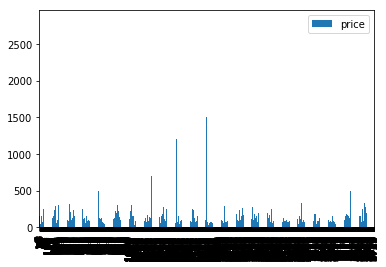

In [32]:
pd.DataFrame(golden_airbnb['price']).plot.bar()

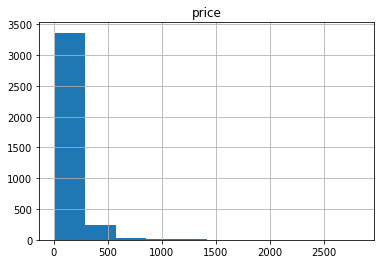

In [33]:
df = pd.DataFrame(golden_airbnb['price'])
hist = df.hist(bins=10)

In [34]:
golden_airbnb['price'].max()

2822.0

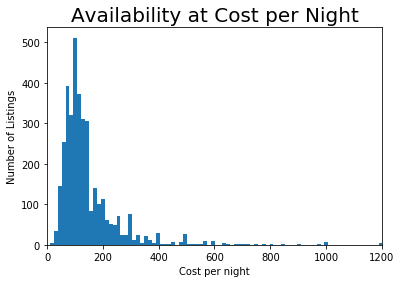

In [35]:
x =plt.hist(golden_airbnb['price'],bins= 200)
plt.xlabel('Cost per night')
plt.ylabel('Number of Listings')
plt.title('Availability at Cost per Night', fontsize=20)
plt.xlim(0,1200)
# set the ylim to ymin, ymax
plt.savefig("Figures/Room_Prices.png")

In [36]:
golden_airbnb['price'][golden_airbnb['price'] > 529].count()

64

In [37]:
# % of observations above $529
64/c

0.017190437818963202

In [38]:
golden_airbnb['price'][golden_airbnb['price'] < 100].count()

1404

In [39]:
# % of observations below $100
1404/c

0.37711522965350525

In [40]:
# % of observations above $99 and below $530
(c-1404-64)/c

0.6056943325275316

In [41]:
golden_airbnb['price'].value_counts()

100.0     165
150.0     144
125.0     124
120.0     118
99.0      110
75.0      108
90.0      106
95.0      103
85.0       94
110.0      81
65.0       80
80.0       78
70.0       73
175.0      68
60.0       67
115.0      67
130.0      59
200.0      57
105.0      55
250.0      55
50.0       54
89.0       53
135.0      52
140.0      45
149.0      43
55.0       42
79.0       39
300.0      35
129.0      35
119.0      33
         ... 
81.0        1
418.0       1
219.0       1
975.0       1
695.0       1
720.0       1
253.0       1
171.0       1
161.0       1
223.0       1
390.0       1
167.0       1
268.0       1
186.0       1
319.0       1
345.0       1
2822.0      1
310.0       1
267.0       1
700.0       1
379.0       1
163.0       1
191.0       1
133.0       1
679.0       1
1300.0      1
750.0       1
193.0       1
312.0       1
474.0       1
Name: price, Length: 284, dtype: int64

In [42]:
#creating CSV file of the golden version to import for machine learning analysis

golden_airbnb.to_csv('golden.csv')

In [43]:
def lin_reg(X, y):
    # Splitting data into train & test
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    # Create a LinearRegression model and fit it to the training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    #print out interesting results
    print(f'The intercept value is: {model.intercept_}')
    predictions = model.predict(X_test)
    MSE = mean_squared_error(y_test, predictions)
    r2 = model.score(X_test, y_test)
    r2a = 1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print(f''' MSE: {MSE}, \n R2: {r2}, \n Radjusted: {r2a} \n \n''')
    print([x for x in zip(model.coef_, X.columns)])
    print('----------------------------------------')
    pd.DataFrame(model.coef_).plot.bar()

# Initial Exploration Regressions on golden data

# Test 1

In [44]:
# Assign X (data) and y (target)
# Maybe instead of city use zipcode but either dummy variable that or scale it? Descale it?
X_t1 = pd.get_dummies(golden_airbnb[["comfort", "zipcode", "host_is_superhost", "host_identity_verified", "property_type", "room_type",
 "cancellation_policy", "instant_bookable", "calculated_host_listings_count", "number_of_reviews", "minimum_nights",
 "accommodates", "bathrooms", "bedrooms", "beds", "city", "host_total_listings_count", "bed_type"]])
y_t1 = golden_airbnb["price"]
print(X_t1.shape, y_t1.shape)

(3661, 92) (3661,)


The intercept value is: -145.70564650249452
 MSE: 18129.445088268374, 
 R2: 0.39412730446248545, 
 Radjusted: 0.3263991295056794 
 

[(18.54759419508785, 'comfort'), (0.0005299273525971038, 'calculated_host_listings_count'), (-0.17084144761210068, 'number_of_reviews'), (-0.9374566724378135, 'minimum_nights'), (-0.3502438403377113, 'accommodates'), (46.92235895220273, 'bathrooms'), (38.346210206465834, 'bedrooms'), (14.959891670460895, 'beds'), (0.9686660208815248, 'host_total_listings_count'), (-10.797464727627135, 'zipcode_20001'), (-54.279331475134256, 'zipcode_20001-4044'), (-28.156296525738103, 'zipcode_20002'), (-18.441500911522418, 'zipcode_20002-6645'), (-8.69906592433787, 'zipcode_20003'), (-40.31857606741692, 'zipcode_20003-3021'), (53.11997331642294, 'zipcode_20004'), (0.6881274434267335, 'zipcode_20005'), (20.359502026472974, 'zipcode_20006'), (28.586372589673953, 'zipcode_20007'), (44.70791198301417, 'zipcode_20007-3413'), (1.915985252070162, 'zipcode_20008'), (-18.24575532

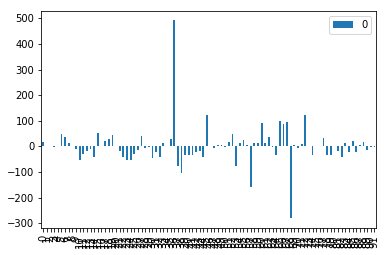

In [45]:
lin_reg(X_t1, y_t1)

# Test 2

In [46]:
# Assign X (data) and y (target)
# Model Has no Zipcodes
X_t2 = golden_airbnb[["minimum_nights", "beds", "host_total_listings_count", "number_of_reviews", "calculated_host_listings_count", 
 "comfort"]].join(pd.get_dummies(golden_airbnb[["host_is_superhost", "host_identity_verified", "property_type", "room_type",
 "cancellation_policy", "instant_bookable", "accommodates", "bathrooms", "bedrooms", "city", "bed_type"]]))
y_t2 = golden_airbnb["price"]
print(X_t2.shape, y_t2.shape)

(3661, 54) (3661,)


The intercept value is: -167.07349527609813
 MSE: 19136.55292854973, 
 R2: 0.3604705025627364, 
 Radjusted: 0.3203606386119672 
 

[(-0.7315545022476231, 'minimum_nights'), (14.924014305849282, 'beds'), (0.9838060175793917, 'host_total_listings_count'), (-0.17719910598376742, 'number_of_reviews'), (0.2518290390367106, 'calculated_host_listings_count'), (18.48392266893715, 'comfort'), (-0.19761701117816344, 'accommodates'), (47.23523513218484, 'bathrooms'), (36.91853026757836, 'bedrooms'), (-6.558091094293724, 'host_is_superhost_f'), (6.558091094293944, 'host_is_superhost_t'), (5.05546398376147, 'host_identity_verified_f'), (-5.055463983761644, 'host_identity_verified_t'), (22.923700496266225, 'property_type_Apartment'), (51.51217631905585, 'property_type_Bed & Breakfast'), (-75.9247570547646, 'property_type_Boat'), (-14.988141741856111, 'property_type_Bungalow'), (13.144030730286687, 'property_type_Cabin'), (10.56704268571548, 'property_type_Condominium'), (-152.3255452277589, 'propert

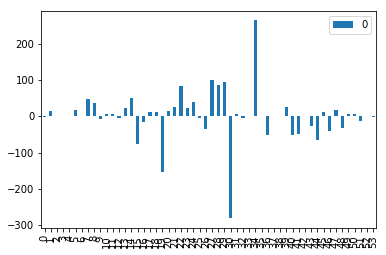

In [47]:
lin_reg(X_t2, y_t2)

# Testing Correlation for feature selection of Beds vs Bedrooms vs Accommodations

# Regression Test 1 for Feature Selection for beds/bedrooms/accommodates

In [48]:
# Assign X (data) and y (target)
# Test one for beds
X_bed = golden_airbnb[["beds"]].join(pd.get_dummies(golden_airbnb[["property_type", "room_type", "city"]]))
y_bed = golden_airbnb["price"]
print(X_bed.shape, y_bed.shape)

(3661, 31) (3661,)


The intercept value is: -82801751609154.86
 MSE: 1.2635348455022634e+22, 
 R2: -4.222640345707093e+17, 
 Radjusted: -4.370719362355192e+17 
 

[(42.248320123265835, 'beds'), (-4693990403968.727, 'property_type_Apartment'), (-4693990403904.671, 'property_type_Bed & Breakfast'), (-4693990404131.283, 'property_type_Boat'), (-4693990403979.963, 'property_type_Bungalow'), (-4693990403993.671, 'property_type_Cabin'), (-4693990403973.885, 'property_type_Condominium'), (-4693990404384.8125, 'property_type_Dorm'), (-4693990403953.607, 'property_type_House'), (-4693990403937.001, 'property_type_Loft'), (-4693990403916.136, 'property_type_Other'), (-4693990403942.719, 'property_type_Townhouse'), (86996714061423.16, 'room_type_Entire home/apt'), (86996714061364.56, 'room_type_Private room'), (86996714061323.55, 'room_type_Shared room'), (499027951783.1291, 'city_Adams Morgan'), (499027952069.0396, 'city_Annapolis'), (-1346030244195.2222, 'city_Arlington'), (499027951739.65784, 'city_Capitol Height

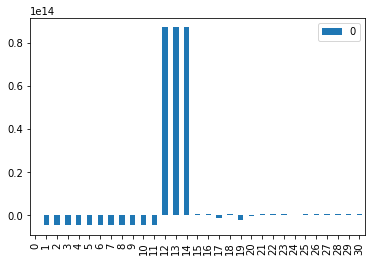

In [49]:
lin_reg(X_bed, y_bed)

# Regression Test 2 for Feature Selection for beds/bedrooms/accommodates

In [50]:
# test 2 for bedrooms
# Assign X (data) and y (target)
X_br = golden_airbnb[["bedrooms"]].join(pd.get_dummies(golden_airbnb[["property_type", "room_type", "city"]]))
y_br = golden_airbnb["price"]
print(X_br.shape, y_br.shape)

(3661, 31) (3661,)


The intercept value is: -480909474200306.5
 MSE: 6.870051169092845e+23, 
 R2: -2.2959204763484033e+19, 
 Radjusted: -2.376433524727137e+19 
 

[(73.29408214098882, 'bedrooms'), (74388420960517.66, 'property_type_Apartment'), (74388420960572.88, 'property_type_Bed & Breakfast'), (74388420960388.52, 'property_type_Boat'), (74388420960486.12, 'property_type_Bungalow'), (74388420960471.27, 'property_type_Cabin'), (74388420960501.58, 'property_type_Condominium'), (74388420960499.89, 'property_type_Dorm'), (74388420960510.45, 'property_type_House'), (74388420960535.52, 'property_type_Loft'), (74388420960614.84, 'property_type_Other'), (74388420960510.98, 'property_type_Townhouse'), (419060297733192.6, 'room_type_Entire home/apt'), (419060297733133.75, 'room_type_Private room'), (419060297733097.2, 'room_type_Shared room'), (-12539244493351.904, 'city_Adams Morgan'), (-12539244493046.04, 'city_Annapolis'), (14595727588.46875, 'city_Arlington'), (-12539244493373.36, 'city_Capitol Heights'), (-

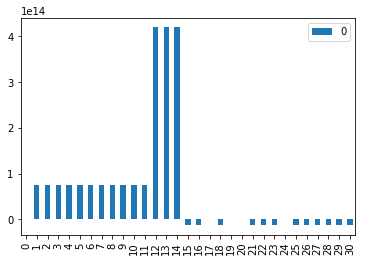

In [51]:
lin_reg(X_br, y_br)

# Regression Test 3 for Feature Selection for beds/bedrooms/accommodates

In [52]:
# test 3 for accommodates
# Assign X (data) and y (target)
X_acc = golden_airbnb[["accommodates"]].join(pd.get_dummies(golden_airbnb[["property_type", "room_type", "city"]]))
y_acc = golden_airbnb["price"]
print(X_acc.shape, y_acc.shape)

(3661, 31) (3661,)


The intercept value is: 768659434161524.6
 MSE: 7.0740063135506165e+22, 
 R2: -2.364080782711744e+18, 
 Radjusted: -2.4469840680783324e+18 
 

[(28.40966143336184, 'accommodates'), (-27489975454605.273, 'property_type_Apartment'), (-27489975454539.7, 'property_type_Bed & Breakfast'), (-27489975454605.266, 'property_type_Boat'), (-27489975454703.125, 'property_type_Bungalow'), (-27489975454367.637, 'property_type_Cabin'), (-27489975454622.63, 'property_type_Condominium'), (-27489975454588.098, 'property_type_Dorm'), (-27489975454594.6, 'property_type_House'), (-27489975454596.395, 'property_type_Loft'), (-27489975454564.664, 'property_type_Other'), (-27489975454596.855, 'property_type_Townhouse'), (-744869626379564.9, 'room_type_Entire home/apt'), (-744869626379603.6, 'room_type_Private room'), (-744869626379638.6, 'room_type_Shared room'), (3700167672712.1577, 'city_Adams Morgan'), (3700167672376.0127, 'city_Annapolis'), (9148111769588.234, 'city_Arlington'), (3700167672581.4775, 'city

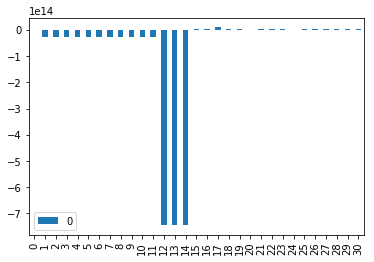

In [53]:
lin_reg(X_acc, y_acc)

# Regression Test 4 for Feature Selection for beds/bedrooms/accommodates

In [54]:
# Assign X (data) and y (target)
# Test four for beds
X_beds = golden_airbnb[["beds"]]
y_beds = golden_airbnb["price"]
print(X_beds.shape, y_beds.shape)

(3661, 1) (3661,)


The intercept value is: 68.11036434920739
 MSE: 23567.59910121577, 
 R2: 0.21238820464278482, 
 Radjusted: 0.21152648495421011 
 

[(47.7556401460101, 'beds')]
----------------------------------------


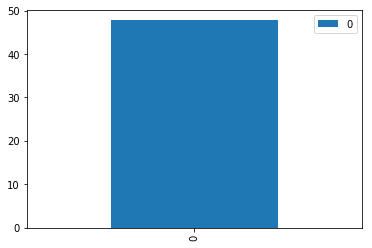

In [55]:
lin_reg(X_beds, y_beds)

# Regression Test 5 for Feature Selection for beds/bedrooms/accommodates

In [56]:
# Assign X (data) and y (target)
# Test five for bedrooms
X_brs = golden_airbnb[["bedrooms"]]
y_brs = golden_airbnb["price"]
print(X_brs.shape, y_brs.shape)

(3661, 1) (3661,)


The intercept value is: 52.88296422135069
 MSE: 21935.339205479027, 
 R2: 0.26693712757080923, 
 Radjusted: 0.2661350894171668 
 

[(77.75068169047964, 'bedrooms')]
----------------------------------------


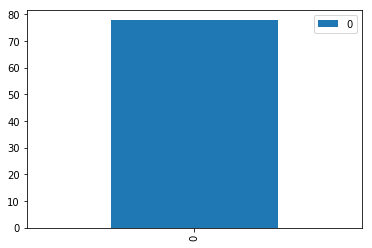

In [57]:
lin_reg(X_brs, y_brs)

# Regression Test 6 for Feature Selection for beds/bedrooms/accommodates

In [58]:
# Assign X (data) and y (target)
# Test six for accommodates
X_accommodates = golden_airbnb[["accommodates"]]
y_accommodates = golden_airbnb["price"]
print(X_accommodates.shape, y_accommodates.shape)

(3661, 1) (3661,)


The intercept value is: 42.8673637871738
 MSE: 22932.664250557835, 
 R2: 0.23360725947793604, 
 Radjusted: 0.23276875538546105 
 

[(32.42055464292939, 'accommodates')]
----------------------------------------


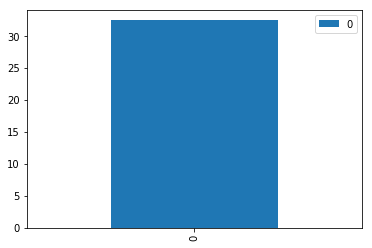

In [59]:
lin_reg(X_accommodates, y_accommodates)

# Regression Test 7 for Feature Selection for beds/bedrooms/accommodates: comfort

In [60]:
# Assign X (data) and y (target)
# Test seven for comfort (acc/beds)
X_comfort = golden_airbnb[["comfort"]]
y_comfort = golden_airbnb["price"]
print(X_comfort.shape, y_comfort.shape)

(3661, 1) (3661,)


The intercept value is: 106.53178371886288
 MSE: 30056.8516076187, 
 R2: -0.004477832289702777, 
 Radjusted: -0.0055768233534769784 
 

[(19.651928471300504, 'comfort')]
----------------------------------------


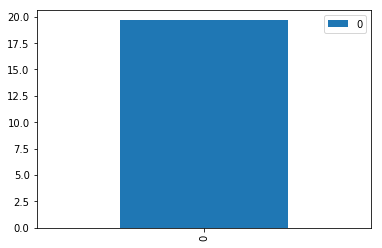

In [61]:
lin_reg(X_comfort, y_comfort)

# Testing with accommodates vs bedrooms

In [62]:
# Assign X (data) and y (target)
#test 8 for bedrooms comfort removed
X_t8br = golden_airbnb[["minimum_nights", "bedrooms", "host_total_listings_count", "number_of_reviews", 
                   "calculated_host_listings_count"]].join(pd.get_dummies(golden_airbnb[["host_is_superhost", "host_identity_verified", "property_type", "room_type",
 "cancellation_policy", "instant_bookable", "bathrooms", "city", "zipcode", "bed_type"]]))
y_t8br = golden_airbnb["price"]
print(X_t8br.shape, y_t8br.shape)

(3661, 89) (3661,)


The intercept value is: -99.30266908481562
 MSE: 18384.191913758244, 
 R2: 0.38561385327367614, 
 Radjusted: 0.3194148616772563 
 

[(-1.0560424518427314, 'minimum_nights'), (48.000784860259856, 'bedrooms'), (0.948002738966899, 'host_total_listings_count'), (-0.13656525978553447, 'number_of_reviews'), (0.21527512104095337, 'calculated_host_listings_count'), (52.353490233288795, 'bathrooms'), (-7.404600312568817, 'host_is_superhost_f'), (7.4046003125695705, 'host_is_superhost_t'), (3.3722841703918327, 'host_identity_verified_f'), (-3.3722841703916924, 'host_identity_verified_t'), (1.5458823388808511, 'property_type_Apartment'), (28.092427953253242, 'property_type_Bed & Breakfast'), (-88.40966241196587, 'property_type_Boat'), (13.917237965446981, 'property_type_Bungalow'), (-10.256168727923704, 'property_type_Cabin'), (-10.892318959646587, 'property_type_Condominium'), (-53.61630214163217, 'property_type_Dorm'), (-2.341912283273073, 'property_type_House'), (7.956692956436385, 'property_t

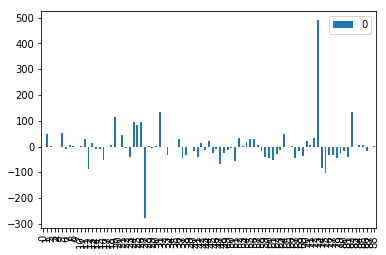

In [63]:
lin_reg(X_t8br, y_t8br)

In [64]:
# Assign X (data) and y (target)
#test 9 for accommodates comfort removed
X_t9acc = golden_airbnb[["minimum_nights", "accommodates", "host_total_listings_count", "number_of_reviews", 
                   "calculated_host_listings_count"]].join(pd.get_dummies(golden_airbnb[["host_is_superhost", "host_identity_verified", "property_type", "room_type",
 "cancellation_policy", "instant_bookable", "bathrooms", "city", "zipcode", "bed_type"]]))
y_t9acc = golden_airbnb["price"]
print(X_t9acc.shape, y_t9acc.shape)

(3661, 89) (3661,)


The intercept value is: -107.40630409878278
 MSE: 18738.668729635865, 
 R2: 0.3737674992956216, 
 Radjusted: 0.3062920845708157 
 

[(-0.8674087444976778, 'minimum_nights'), (17.798332746394134, 'accommodates'), (1.0013379450102518, 'host_total_listings_count'), (-0.21626185450953272, 'number_of_reviews'), (-0.16170697916608034, 'calculated_host_listings_count'), (64.39994688338912, 'bathrooms'), (-6.338266185303645, 'host_is_superhost_f'), (6.338266185306271, 'host_is_superhost_t'), (4.797660151209186, 'host_identity_verified_f'), (-4.797660151209955, 'host_identity_verified_t'), (3.707435267046554, 'property_type_Apartment'), (35.88628334426173, 'property_type_Bed & Breakfast'), (-45.01516985172138, 'property_type_Boat'), (8.469311233473306, 'property_type_Bungalow'), (29.017937563642995, 'property_type_Cabin'), (-10.274196125862717, 'property_type_Condominium'), (-123.16789396468994, 'property_type_Dorm'), (6.1252035346056175, 'property_type_House'), (3.943306194458934, 'property_ty

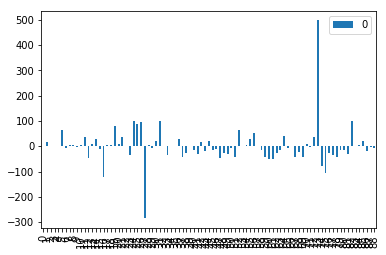

In [65]:
lin_reg(X_t9acc, y_t9acc)

# Conclusion is bedrooms matters more than accommodates

# EDA for Room Type

In [66]:
#Next Tests... maybe divide data out by Roomtype?
golden_airbnb['room_type'].value_counts()

Entire home/apt    2376
Private room       1188
Shared room          97
Name: room_type, dtype: int64

In [67]:
entire_home = golden_airbnb[golden_airbnb['room_type'] == 'Entire home/apt'].copy()
private_room = golden_airbnb[golden_airbnb['room_type'] == 'Private room'].copy()
private_room['room_type'].value_counts()

Private room    1188
Name: room_type, dtype: int64

In [68]:
entire_home['room_type'].value_counts()

Entire home/apt    2376
Name: room_type, dtype: int64

In [69]:
#Removing Room Type
entire_home = entire_home[[
    'zipcode',
    'price',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'bed_type',
    'host_is_superhost',
    'host_identity_verified',
    'property_type',
    'cancellation_policy',
    'instant_bookable',
    'calculated_host_listings_count',
    'host_total_listings_count',
    'number_of_reviews',
    'minimum_nights',
    'city',
    'comfort',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365'
]]
entire_home.head()

,zipcode,price,accommodates,bathrooms,bedrooms,beds,bed_type,host_is_superhost,host_identity_verified,property_type,...,calculated_host_listings_count,host_total_listings_count,number_of_reviews,minimum_nights,city,comfort,availability_30,availability_60,availability_90,availability_365
0,20003,160.0,4,1.0,1.0,2.0,Real Bed,f,t,House,...,18,26,0,1,Washington,2.0,0,0,8,283
1,20003,350.0,6,3.0,3.0,3.0,Real Bed,f,f,House,...,1,1,65,2,Washington,2.0,12,38,68,343
4,20910,50.0,4,1.0,1.0,1.0,Real Bed,f,t,Townhouse,...,1,1,0,7,Silver Spring,4.0,16,46,76,351
5,20024,99.0,4,1.0,2.0,4.0,Real Bed,f,t,Boat,...,1,1,0,1,Washington,1.0,26,56,86,361
6,20012,100.0,4,2.0,2.0,2.0,Real Bed,f,t,Condominium,...,1,1,0,3,Washington,2.0,13,13,17,21


In [70]:
#Removing Room Type
private_room = private_room[[
    'zipcode',
    'price',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'bed_type',
    'host_is_superhost',
    'host_identity_verified',
    'property_type',
    'cancellation_policy',
    'instant_bookable',
    'calculated_host_listings_count',
    'host_total_listings_count',
    'number_of_reviews',
    'minimum_nights',
    'city',
    'comfort',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365'
]]
entire_home.head()

,zipcode,price,accommodates,bathrooms,bedrooms,beds,bed_type,host_is_superhost,host_identity_verified,property_type,...,calculated_host_listings_count,host_total_listings_count,number_of_reviews,minimum_nights,city,comfort,availability_30,availability_60,availability_90,availability_365
0,20003,160.0,4,1.0,1.0,2.0,Real Bed,f,t,House,...,18,26,0,1,Washington,2.0,0,0,8,283
1,20003,350.0,6,3.0,3.0,3.0,Real Bed,f,f,House,...,1,1,65,2,Washington,2.0,12,38,68,343
4,20910,50.0,4,1.0,1.0,1.0,Real Bed,f,t,Townhouse,...,1,1,0,7,Silver Spring,4.0,16,46,76,351
5,20024,99.0,4,1.0,2.0,4.0,Real Bed,f,t,Boat,...,1,1,0,1,Washington,1.0,26,56,86,361
6,20012,100.0,4,2.0,2.0,2.0,Real Bed,f,t,Condominium,...,1,1,0,3,Washington,2.0,13,13,17,21


In [71]:
private_room.to_csv("private.csv")
entire_home.to_csv("entire.csv")

In [72]:
max_room = private_room['price'].max()
max_home = entire_home['price'].max()
print(f'The highest price per night for a room is: {max_room}')
print(f'The highest price per night for an entire home is: {max_home}')

The highest price per night for a room is: 1300.0
The highest price per night for an entire home is: 2822.0


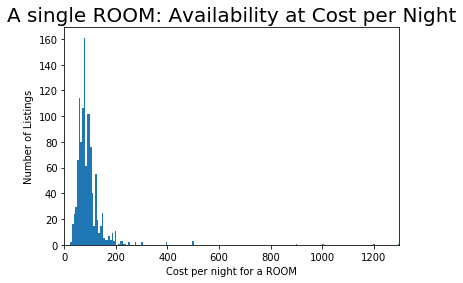

In [73]:
x =plt.hist(private_room['price'],bins= 200)
plt.xlabel('Cost per night for a ROOM')
plt.ylabel('Number of Listings')
plt.title('A single ROOM: Availability at Cost per Night', fontsize=20)
plt.xlim(0,max_room)
# set the ylim to ymin, ymax
plt.savefig("Figures/Individual_Room_Prices.png")

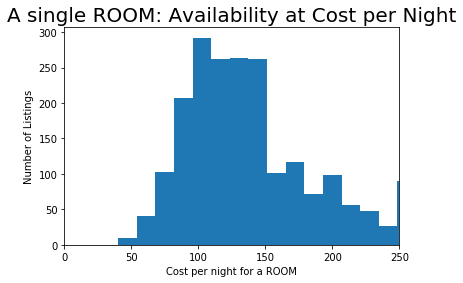

In [74]:
x =plt.hist(entire_home['price'],bins= 200)
plt.xlabel('Cost per night for a ROOM')
plt.ylabel('Number of Listings')
plt.title('A single ROOM: Availability at Cost per Night', fontsize=20)
plt.xlim(0,250)
# set the ylim to ymin, ymax
plt.savefig("Figures/Individual_Room_Prices_250.png")

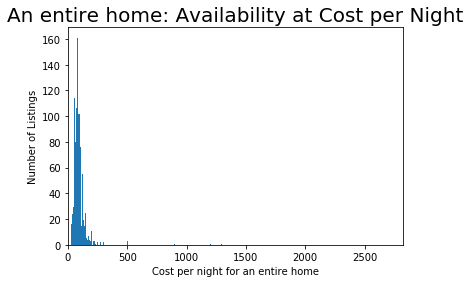

In [75]:
x =plt.hist(private_room['price'],bins= 200)
plt.xlabel('Cost per night for an entire home')
plt.ylabel('Number of Listings')
plt.title('An entire home: Availability at Cost per Night', fontsize=20)
plt.xlim(0, max_home)
# set the ylim to ymin, ymax
plt.savefig("Figures/Entire_Home_Prices.png")

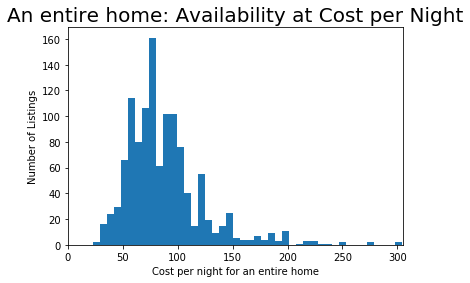

In [76]:
x =plt.hist(private_room['price'],bins= 200)
plt.xlabel('Cost per night for an entire home')
plt.ylabel('Number of Listings')
plt.title('An entire home: Availability at Cost per Night', fontsize=20)
plt.xlim(0, 305)
# set the ylim to ymin, ymax
plt.savefig("Figures/Entire_Home_Prices_305.png")

In [77]:
entire_home['price'][entire_home['price'] > 305].count()

208

In [78]:
private_room['price'][private_room['price'] > 250].count()

13

In [79]:
private_room['price'][private_room['price'] > 305].count()

9

In [80]:
private_room['property_type'].value_counts()

House              692
Apartment          379
Bed & Breakfast     48
Townhouse           30
Condominium         24
Loft                 8
Other                6
Bungalow             1
Name: property_type, dtype: int64

In [81]:
entire_home['property_type'].value_counts()

Apartment          1762
House               487
Condominium          61
Townhouse            39
Loft                 16
Bed & Breakfast       5
Other                 3
Boat                  2
Cabin                 1
Name: property_type, dtype: int64

In [82]:
shared_total = golden_airbnb['room_type'][golden_airbnb['room_type'] == 'Shared room'].count()
c2 = golden_airbnb['room_type'].count()
print(f'''There are {entire_home['price'].count()} Entire Homes available for rent out of {c2} total rental options which is {round(entire_home['price'].count()/c2,2)} %''')
print(f'''There are {private_room['price'].count()} Entire Homes available for rent out of {c2} total rental options which is {round(private_room['price'].count()/c2,2)} %''')
print(f'''There are {shared_total} Shared Rooms available for rent out of {c2} total rental options which is {round(shared_total/c2,2)} %''')

There are 2376 Entire Homes available for rent out of 3661 total rental options which is 0.65 %
There are 1188 Entire Homes available for rent out of 3661 total rental options which is 0.32 %
There are 97 Shared Rooms available for rent out of 3661 total rental options which is 0.03 %


# Let's see if a regression works better with room type separate data types instead of as dummy variables.

In [83]:
# Assign X (data) and y (target)
# Model has no room types
# Private Room Per Night is the price
X_priv = private_room[["minimum_nights", "beds", "host_total_listings_count", "number_of_reviews", "calculated_host_listings_count", 
 "comfort"]].join(pd.get_dummies(private_room[["host_is_superhost", "host_identity_verified", "property_type", "zipcode",
 "cancellation_policy", "instant_bookable", "accommodates", "bathrooms", "bedrooms", "city", "bed_type"]]))
y_priv = private_room["price"]
print(X_priv.shape, y_priv.shape)

(1188, 69) (1188,)


The intercept value is: -64.93823485146739
 MSE: 3441.466835031398, 
 R2: 0.24500891133765246, 
 Radjusted: 0.015518227999758327 
 

[(-0.6935537562345878, 'minimum_nights'), (-4.090910151653323, 'beds'), (1.2493645138357596, 'host_total_listings_count'), (-0.110605898702266, 'number_of_reviews'), (-0.9075491745189614, 'calculated_host_listings_count'), (3.664312864333807, 'comfort'), (9.368556582489873, 'accommodates'), (2.748529669526679, 'bathrooms'), (-1.0118128557223827e-11, 'bedrooms'), (-6.632475087700634, 'host_is_superhost_f'), (6.632475087729535, 'host_is_superhost_t'), (6.980924466271317, 'host_identity_verified_f'), (-6.9809244662715795, 'host_identity_verified_t'), (-7.643596422836449, 'property_type_Apartment'), (43.00250775885616, 'property_type_Bed & Breakfast'), (-22.914758750232846, 'property_type_Bungalow'), (-14.321361608551495, 'property_type_Condominium'), (-7.747651370775342, 'property_type_House'), (18.431422209088414, 'property_type_Loft'), (-9.568684694375476,

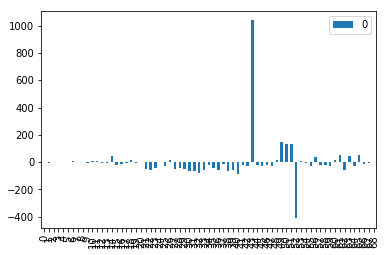

In [84]:
lin_reg(X_priv, y_priv)

# Wow, it's terrible at predicting a room!

In [85]:
# Assign X (data) and y (target)
# Model has no room types
# Entire Home Per Night is the price
X_entire = entire_home[["minimum_nights", "beds", "host_total_listings_count", "number_of_reviews", "calculated_host_listings_count", 
 "comfort"]].join(pd.get_dummies(entire_home[["host_is_superhost", "host_identity_verified", "property_type", "zipcode",
 "cancellation_policy", "instant_bookable", "accommodates", "bathrooms", "bedrooms", "city", "bed_type"]]))
y_entire = entire_home["price"]
print(X_entire.shape, y_entire.shape)

(2376, 80) (2376,)


The intercept value is: -76.61546544839047
 MSE: 16370.977333710776, 
 R2: 0.48484904119980415, 
 Radjusted: 0.4045136090282335 
 

[(-2.4600332138984387, 'minimum_nights'), (4.611228538492233, 'beds'), (0.8587047769595206, 'host_total_listings_count'), (-0.22898432722769257, 'number_of_reviews'), (0.07545384862110005, 'calculated_host_listings_count'), (5.626979319833595, 'comfort'), (6.459011696612636, 'accommodates'), (70.86401858406717, 'bathrooms'), (29.16895082984022, 'bedrooms'), (-14.452363534330464, 'host_is_superhost_f'), (14.452363534330095, 'host_is_superhost_t'), (2.6848977428289365, 'host_identity_verified_f'), (-2.684897742828379, 'host_identity_verified_t'), (11.503933385340163, 'property_type_Apartment'), (67.22559927782909, 'property_type_Bed & Breakfast'), (-69.60168075994386, 'property_type_Boat'), (-2.1316282072803006e-14, 'property_type_Cabin'), (-4.3858442862468054, 'property_type_Condominium'), (-11.382578047973434, 'property_type_House'), (16.04242826067059, 'p

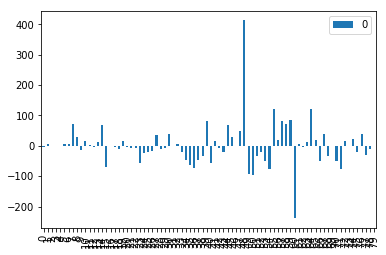

In [86]:
lin_reg(X_entire, y_entire)

# But it does much better with an entire home!

# Time to do EDA on availability driving price 30/60/90/365

# Test 14 for a30

In [87]:
# Assign X (data) and y (target)
# Test 14 for a30
X_a30 = entire_home[["accommodates", "availability_30"]]
y_a30 = entire_home["price"]
print(X_a30.shape, y_a30.shape)

(2376, 2) (2376,)


The intercept value is: 41.973492357591795
 MSE: 22252.706763383732, 
 R2: 0.299766715732278, 
 Radjusted: 0.29739705994795407 
 

[(30.760819143848387, 'accommodates'), (2.1294173913751306, 'availability_30')]
----------------------------------------


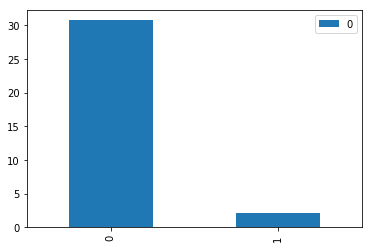

In [88]:
lin_reg(X_a30, y_a30)

# Test 15 for a60

In [89]:
# Assign X (data) and y (target)
# Test 15 for a60
X_a60 = entire_home[["accommodates", "availability_60"]]
y_a60 = entire_home["price"]
print(X_a60.shape, y_a60.shape)

(2376, 2) (2376,)


The intercept value is: 42.13483188820396
 MSE: 22600.31498554599, 
 R2: 0.2888284128268688, 
 Radjusted: 0.2864217407890579 
 

[(31.08062660366636, 'accommodates'), (0.726088496325359, 'availability_60')]
----------------------------------------


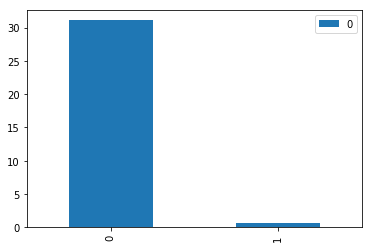

In [90]:
lin_reg(X_a60, y_a60)

# Test 16 for a90

In [91]:
# Assign X (data) and y (target)
# Test 16 for a90
X_a90 = entire_home[["accommodates", "availability_90"]]
y_a90 = entire_home["price"]
print(X_a90.shape, y_a90.shape)

(2376, 2) (2376,)


The intercept value is: 44.330523367632
 MSE: 22696.944821041307, 
 R2: 0.2857877298310152, 
 Radjusted: 0.2833707678338274 
 

[(31.40171570900514, 'accommodates'), (0.33138529767226715, 'availability_90')]
----------------------------------------


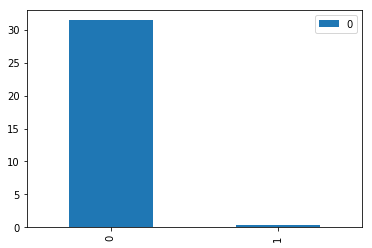

In [92]:
lin_reg(X_a90, y_a90)

# Test 17 for a365

In [93]:
# Assign X (data) and y (target)
# Test 17 for a365
X_a365 = entire_home[["accommodates", "availability_365"]]
y_a365 = entire_home["price"]
print(X_a365.shape, y_a365.shape)

(2376, 2) (2376,)


The intercept value is: 57.4908189653527
 MSE: 22723.76945376792, 
 R2: 0.2849436302402032, 
 Radjusted: 0.2825238117300177 
 

[(32.195515681070276, 'accommodates'), (-0.010784734468327756, 'availability_365')]
----------------------------------------


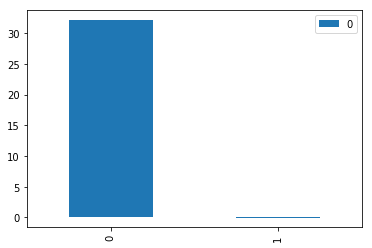

In [94]:
lin_reg(X_a365, y_a365)

# Results are inconclusive but as predicted a30 is better than all others. Worth exploring further

# Test 18 to include a30 in entire_home best lin_reg

In [95]:
# Assign X (data) and y (target)
# Model has no room types
# Entire Home Per Night is the price
# A30 included
X_t18 = entire_home[["minimum_nights", "beds", "host_total_listings_count", "number_of_reviews", "calculated_host_listings_count", "availability_30", 
 "comfort"]].join(pd.get_dummies(entire_home[["host_is_superhost", "host_identity_verified", "property_type", "zipcode",
 "cancellation_policy", "instant_bookable", "accommodates", "bathrooms", "bedrooms", "city", "bed_type"]]))
y_t18 = entire_home["price"]
print(X_t18.shape, y_t18.shape)

(2376, 81) (2376,)


The intercept value is: -87.92995244569039
 MSE: 16160.58251163741, 
 R2: 0.4914696046584383, 
 Radjusted: 0.41101850695791786 
 

[(-2.1732209668661198, 'minimum_nights'), (4.535641576080598, 'beds'), (0.7695474506606099, 'host_total_listings_count'), (-0.21816489738006783, 'number_of_reviews'), (-0.20022842553976616, 'calculated_host_listings_count'), (1.3525700144970685, 'availability_30'), (5.304713082471299, 'comfort'), (6.063220315081178, 'accommodates'), (71.42094888417358, 'bathrooms'), (28.86332578896425, 'bedrooms'), (-14.34395526376256, 'host_is_superhost_f'), (14.343955263763497, 'host_is_superhost_t'), (1.6666562073719309, 'host_identity_verified_f'), (-1.6666562073716875, 'host_identity_verified_t'), (13.601973320648632, 'property_type_Apartment'), (65.37882837142587, 'property_type_Bed & Breakfast'), (-87.79170698741915, 'property_type_Boat'), (-2.7000623958883807e-13, 'property_type_Cabin'), (0.018890105601049534, 'property_type_Condominium'), (-10.427121642153004, 'pro

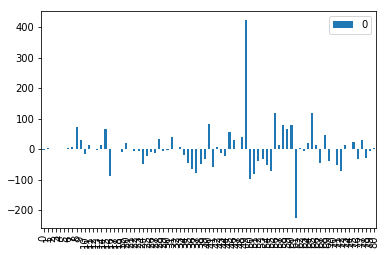

In [96]:
lin_reg(X_t18, y_t18)

# A30 seems to help!

# Test 19 removing Accommodates

In [97]:
# Assign X (data) and y (target)
# Model has no room types
# Entire Home Per Night is the price
# A30 included
# Accommodates was removed
X_t19 = entire_home[["minimum_nights", "beds", "host_total_listings_count", "number_of_reviews", "calculated_host_listings_count", "availability_30", 
 "comfort"]].join(pd.get_dummies(entire_home[["host_is_superhost", "host_identity_verified", "property_type", "zipcode",
 "cancellation_policy", "instant_bookable", "bathrooms", "bedrooms", "city", "bed_type"]]))
y_t19 = entire_home["price"]
print(X_t19.shape, y_t19.shape)

(2376, 80) (2376,)


The intercept value is: -100.34327528044861
 MSE: 15953.984444655654, 
 R2: 0.497970694368749, 
 Radjusted: 0.41968152389993785 
 

[(-2.1915371006878077, 'minimum_nights'), (13.276940245967966, 'beds'), (0.7644771738169314, 'host_total_listings_count'), (-0.21369297649999286, 'number_of_reviews'), (-0.15225287366693507, 'calculated_host_listings_count'), (1.3599090067657826, 'availability_30'), (12.655537894611484, 'comfort'), (72.294705386527, 'bathrooms'), (30.491286495550806, 'bedrooms'), (-14.628763166211902, 'host_is_superhost_f'), (14.628763166211357, 'host_is_superhost_t'), (1.5148148365661633, 'host_identity_verified_f'), (-1.5148148365653107, 'host_identity_verified_t'), (14.137590290976156, 'property_type_Apartment'), (66.62337351265028, 'property_type_Bed & Breakfast'), (-97.04916078702719, 'property_type_Boat'), (4.476419235288631e-13, 'property_type_Cabin'), (1.223546604812796, 'property_type_Condominium'), (-9.278708221016972, 'property_type_House'), (20.872106435945327,

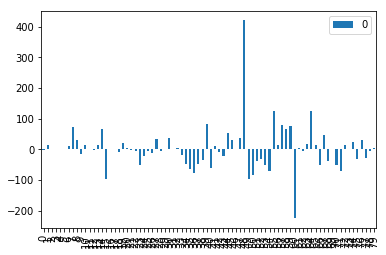

In [98]:
lin_reg(X_t19, y_t19)

# PCA Test

In [104]:
features = entire_home[["minimum_nights", "beds", "host_total_listings_count", "number_of_reviews", "calculated_host_listings_count", "availability_30", 
 "comfort", "bathrooms", "bedrooms"]]
x = entire_home.loc[:, features].values
y = entire_home.loc[:,'price'].values

ValueError: Cannot index with multidimensional key

In [100]:
x = StandardScaler().fit_transform(x)


ValueError: could not convert string to float: 'f'

In [ ]:
pd.DataFrame(data = x, columns = features).head()

In [ ]:
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head()

In [ ]:
finalDf = pd.concat([principalDf, entire_home[['price']]], axis = 1)
finalDf.head(5)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = enitre_home['price']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['price'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()



In [ ]:
pca.explained_variance_ratio_